In [46]:
import pandas as pd
import librosa
from librosa import display
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
import soundfile as sf

In [271]:
sound_metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [4]:
def category_data(data):
    data_dict = {}
    for sound_class in data['class'].unique():
        data_dict[sound_class] = data.loc[data['class'] == sound_class,:]
    return data_dict
data_dict = category_data(sound_metadata)

In [5]:
data_dict['air_conditioner']

slice_file_name    fsID  start   end  salience  fold  classID  \
22     100852-0-0-0.wav  100852    0.0   4.0         1     5        0   
23     100852-0-0-1.wav  100852    0.5   4.5         1     5        0   
24    100852-0-0-10.wav  100852    5.0   9.0         1     5        0   
25    100852-0-0-11.wav  100852    5.5   9.5         1     5        0   
26    100852-0-0-12.wav  100852    6.0  10.0         1     5        0   
...                 ...     ...    ...   ...       ...   ...      ...   
8307    85569-0-0-5.wav   85569    2.5   6.5         1     5        0   
8308    85569-0-0-6.wav   85569    3.0   7.0         1     5        0   
8309    85569-0-0-7.wav   85569    3.5   7.5         1     5        0   
8310    85569-0-0-8.wav   85569    4.0   8.0         1     5        0   
8311    85569-0-0-9.wav   85569    4.5   8.5         1     5        0   

                class  
22    air_conditioner  
23    air_conditioner  
24    air_conditioner  
25    air_conditioner  
26    air_conditioner  
...               ...  
8307  air_conditioner  
8308  air_conditioner  
8309  air_conditioner  
8310  air_conditioner  
8311  air_conditioner  

[1000 rows x 8 columns]

In [6]:
# get the path of a specific sound
# if file_name is one, it will return the 3rd one from the class order by index
# if file_name is random, it will random pick one
def get_the_sound(sound_class, file_name='none'):
    if file_name == 'none':
        name = data_dict[sound_class].iloc[2,]['slice_file_name']
        fold = data_dict[sound_class].iloc[2,]['fold']
        return 'UrbanSound8K/audio/fold'+ str(fold)+'/'+name
    elif file_name=='random':
        random_index = np.random.choice(range(len(data_dict[sound_class])))
        name = data_dict[sound_class].iloc[random_index,]['slice_file_name']
        fold = data_dict[sound_class].iloc[random_index,]['fold']
        return 'UrbanSound8K/audio/fold'+ str(fold)+'/'+name
    else:
        fold = int(data_dict[sound_class].loc[data_dict[sound_class]['slice_file_name'] == file_name,:]['fold'])
        return 'UrbanSound8K/audio/fold'+ str(fold)+'/'+file_name


In [340]:
all_classes = []
num_each = []
for key in data_dict.keys():
    all_classes.append(key)
    num_each.append(len(data_dict[key]))
    
pd.DataFrame({'class':all_classes,'num_of_obs':num_each})

class  num_of_obs
0          dog_bark        1000
1  children_playing        1000
2          car_horn         429
3   air_conditioner        1000
4      street_music        1000
5          gun_shot         374
6             siren         929
7     engine_idling        1000
8        jackhammer        1000
9          drilling        1000

----

### get a random sound from each class
> Visualizing the sound. Time vs Amplitudes

In [7]:
random_dog_bark = get_the_sound('dog_bark','random')
random_air_conditioner = get_the_sound('air_conditioner','random')

In [26]:
samples_random_dog_bark , sampling_rate_random_dog_bark = librosa.load(random_dog_bark)
samples_random_air_conditioner , sampling_rate_random_air_conditioner = librosa.load(random_air_conditioner)

In [8]:
Audio(random_dog_bark)

In [9]:
Audio(random_air_conditioner)

In [10]:
# plot time vs amplitudes from a random sample from each class

def sample_each_class():
    random_samples = {}
    files_list = []
    classes = data_dict.keys()
    for each_class in classes:
        np.random.seed(3)
        the_sample = get_the_sound(each_class,'random')
        random_samples[each_class] =  librosa.load(the_sample, sr=None)
        
        files_list.append(the_sample)
    return random_samples, files_list

random_samples,file_list = sample_each_class()

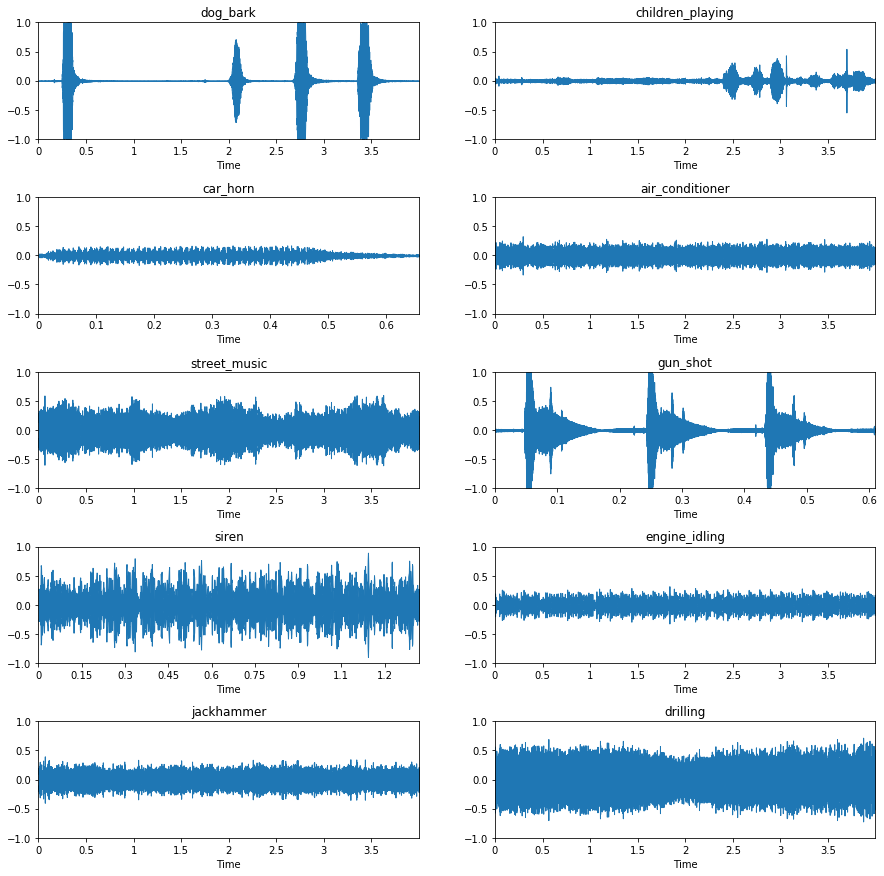

In [12]:
# plot all the samples with same y_lim

plt.figure(figsize=(15, 15)) 
plt.subplots_adjust(hspace=0.5)

for i in range(1,11):
    the_class = list(data_dict.keys())[i-1]
    plt.subplot(5,2,i)
    librosa.display.waveplot(y=random_samples[the_class][0], sr=random_samples[the_class][1]);
    plt.ylim(-1,1)
    plt.title(the_class)


## Fast Fourier Transform the Sound  (FFT)

In [13]:
def fft_transform(sound, rate):
    length = len(sound)
    time = 1/rate
    yf = scipy.fft(sound)
    xf = np.linspace(0.0, 1.0/(2.0*time), length/2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/length * np.abs(yf[:length//2]))
    plt.grid()
    plt.xlabel('Frenquency -->')
    plt.ylabel('Magnitude')
    return plt.show()

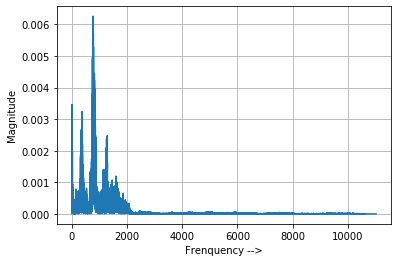

In [25]:
fft_transform(samples_random_dog_bark , sampling_rate_random_dog_bark);

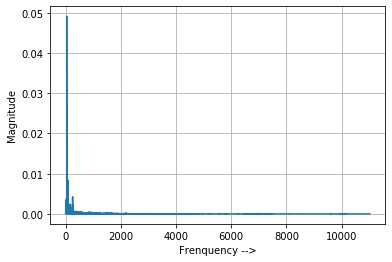

In [27]:
fft_transform(samples_random_air_conditioner , sampling_rate_random_air_conditioner);

---

In [217]:
test_sound = get_the_sound('dog_bark','random')

In [235]:
Audio(test_sound)

In [261]:
test_sample,test_sample_rate = librosa.load(test_sound)

In [315]:
test_sample.max() / 0.07

13.479342630931308

In [316]:
test_sample = test_sample/13

In [317]:
sf.write('test1.wav',test_sample,test_sample_rate)

In [318]:
Audio('test1.wav')

In [247]:
my_voice,my_voice_rate = librosa.load('my_voice_sample.wav')

In [248]:
# combine two sounds and divide each one' amplitude by 2
def combine_voice_array(noise,target_voice):
    len_a = len(noise)
    len_b = len(target_voice)
    a = noise.copy()
    b = target_voice.copy()
    if len_a < len_b:
        b[:len_a] += a
        return (b / 2)
    else:
        a[:len_b] += b
        return (a/ 2)

In [249]:
test_combine = combine_voice_array(test_sample,my_voice)

In [328]:
predict_mfcc_test = librosa.feature.mfcc(y=test_combine,sr=test_rate,n_mfcc=40)

In [330]:
predict_mfcc_test.shape

(40, 222)

In [250]:
sf.write('test_combine.wav',test_combine, test_rate)

In [331]:
Audio('test_combine.wav')

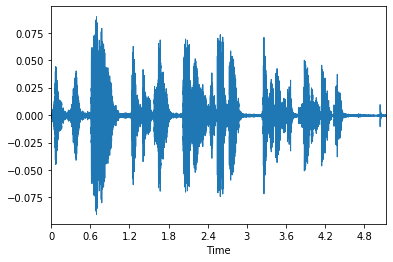

In [252]:
# wave plot of my_voice combined with a random noise
librosa.display.waveplot(y=test_combine, sr=test_rate);

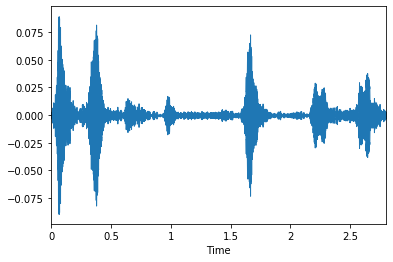

In [253]:
# wave plot of a random noise
librosa.display.waveplot(y=test_sample, sr=test_rate);

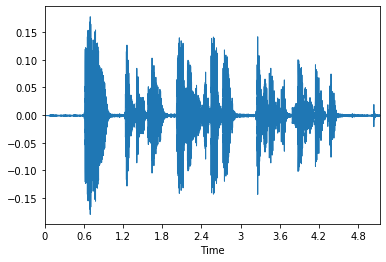

In [254]:
# wave plot of my voice
ibrosa.display.waveplot(y=my_voice, sr=test_rate);

---

---

----